In [113]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
sns.set()

In [114]:
# Load the data from a .csv
df = pd.read_csv('logistic_regression_dataset.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0


In [115]:
df["sex"]=df["sex"].map({"M":1,"F":0})


In [116]:
df["is_smoking"]=df["is_smoking"].map({"YES":1,"NO":0})


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   sex              4238 non-null   int64  
 4   is_smoking       4238 non-null   int64  
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   float64
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       3390 non-null   float64
dtypes: float64(10)

In [118]:
df.isna().sum()

id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64

In [119]:
#validate missing values
df.isnull().sum()

id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64

In [167]:
#Mean/Median Imputation: Replace missing values in each feature (vector component) with the mean or median value of that feature across the dataset.
#Mode Imputation: For categorical features, you can replace missing values with the mode (most frequent category) of that feature.
df['education'].fillna(df['education'].mean(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mean(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

                  
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [168]:
df.dropna(axis=0,inplace=True)

In [169]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [170]:
#show statistic
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.971141,0.432743,0.497640,9.069047,0.029883,0.006490,0.315339,0.025664,237.070330,132.60118,82.883038,25.794994,75.977250,82.075780,0.150737
std,978.753033,8.592878,1.005916,0.495529,0.500068,11.840459,0.169190,0.080309,0.464719,0.158153,44.993056,22.29203,12.023581,4.106939,11.970102,23.131833,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,235.000000,128.50000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,2541.750000,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


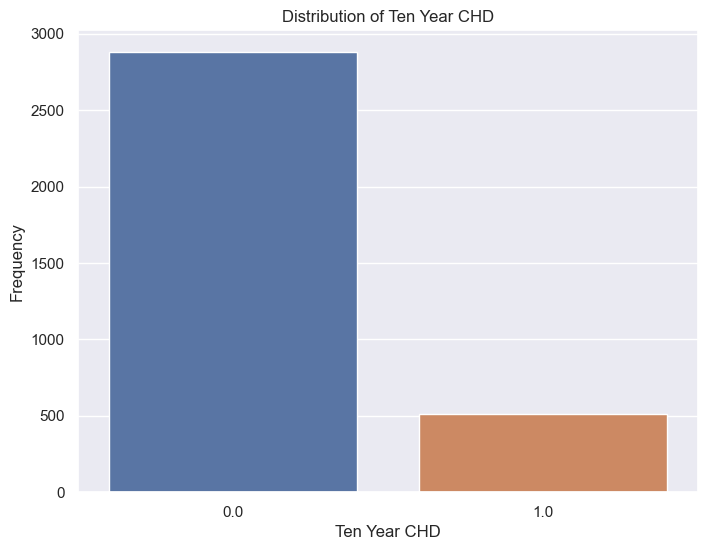

In [171]:
#Visualizing Data Distributions
plt.figure(figsize=(8, 6))
sns.countplot(x=df["TenYearCHD"])
plt.xlabel('Ten Year CHD')
plt.ylabel('Frequency')
plt.title('Distribution of Ten Year CHD')
plt.show()

In [172]:
#declare features vector and target
x = df[['is_smoking','prevalentHyp','diabetes','diaBP','sysBP']]
y = df['TenYearCHD']

In [173]:
x.isnull().sum()


is_smoking      0
prevalentHyp    0
diabetes        0
diaBP           0
sysBP           0
dtype: int64

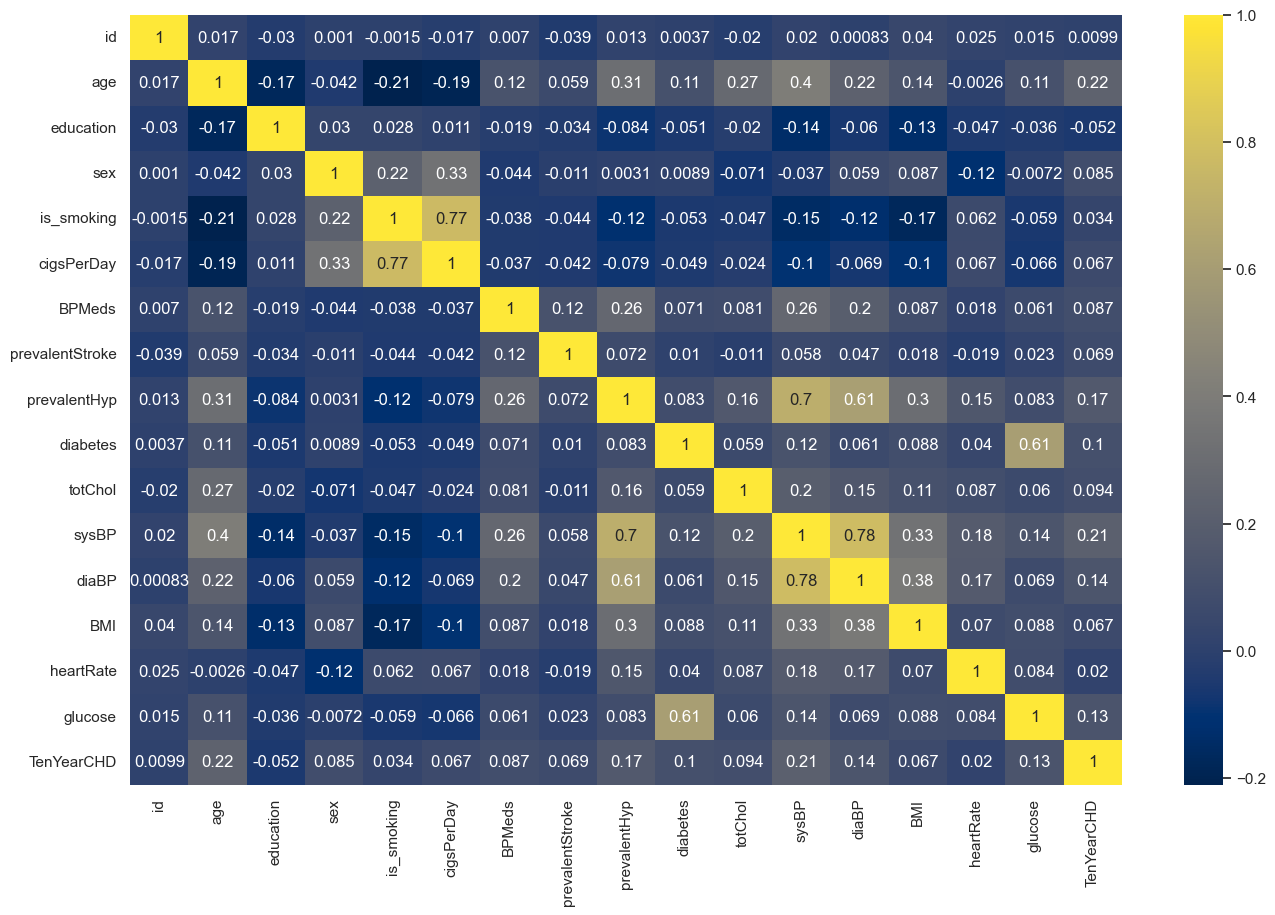

In [174]:
# correlation plot
plt.figure(figsize=(16, 10))
corr = df.corr()
sns.heatmap(corr, cmap = 'cividis', annot= True);
plt.show()

In [175]:
#declare features vector and target
x = df[['is_smoking','prevalentHyp','diabetes','diaBP','sysBP']]
y = df['TenYearCHD']

In [176]:
x

,is_smoking,prevalentHyp,diabetes,diaBP,sysBP
0,1,0,0,85.0,148.0
1,0,1,0,98.0,168.0
2,1,0,0,71.0,116.0
3,1,1,0,88.0,158.0
4,1,0,0,85.0,136.5
...,...,...,...,...,...
3385,0,0,0,79.0,123.5
3386,0,0,0,56.0,102.0
3387,1,1,0,119.0,164.0
3388,0,1,0,105.0,167.0


In [177]:
y.shape

(3390,)

In [178]:
#split data to train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [179]:
y_train

2378    0.0
3182    0.0
921     0.0
2244    0.0
3131    0.0
       ... 
1095    1.0
1130    0.0
1294    0.0
860     0.0
3174    0.0
Name: TenYearCHD, Length: 2712, dtype: float64

In [180]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [191]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(x)


array([[ 1.00473095, -0.67865848, -0.16229507,  0.17609346,  0.69087885],
       [-0.99529132,  1.47349517, -0.16229507,  1.25746162,  1.58819287],
       [ 1.00473095, -0.67865848, -0.16229507, -0.98845688, -0.74482357],
       ...,
       [ 1.00473095,  1.47349517, -0.16229507,  3.00428713,  1.40873006],
       [-0.99529132,  1.47349517, -0.16229507,  1.83973679,  1.54332716],
       [-0.99529132, -0.67865848, -0.16229507, -0.48936388, -0.38589796]])

In [ ]:
#split data to train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [195]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [197]:
#nmaking prediction
y_pred = lr.predict(x_train)

In [198]:
print("R-squared:", lr.score(x_train, y_train).round(3))

R-squared: 0.847


In [199]:
print("Coefficient:", lr.coef_.round(3))

Coefficient: [[ 0.362  0.269  0.784 -0.014  0.024]]


In [200]:
print("Intercept:", lr.intercept_.round(3))

Intercept: [-4.212]


In [201]:
log_reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
log_reg_summary['Weights'] = lr.coef_[0]
log_reg_summary

,Features,Weights
0,is_smoking,0.361780
1,prevalentHyp,0.268663
2,diabetes,0.784153
3,diaBP,-0.013500
4,sysBP,0.024319


In [202]:
# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 84.70%


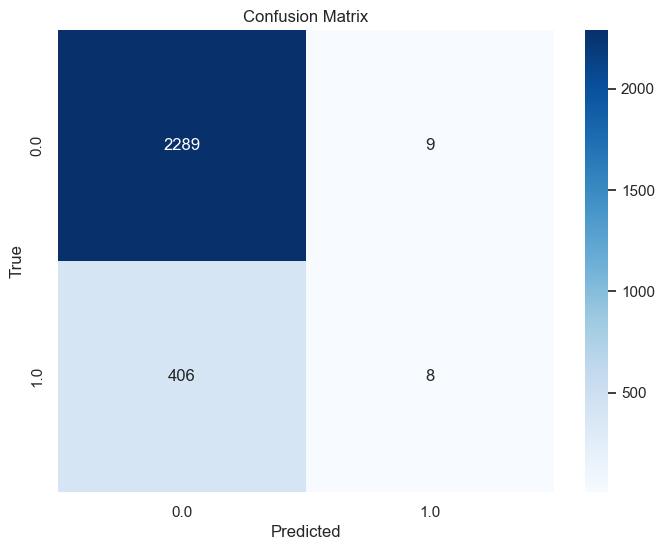

In [203]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

column_labels = list(y_train.unique())
cm = confusion_matrix(y_train, y_pred, labels=column_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=column_labels, yticklabels=column_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [204]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      2298
         1.0       0.47      0.02      0.04       414

    accuracy                           0.85      2712
   macro avg       0.66      0.51      0.48      2712
weighted avg       0.79      0.85      0.78      2712



In [208]:
#make prediction
y_test_pred = lr.predict(x_test)

In [209]:
# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy2 = accuracy_score(y_test, y_test_pred)
print(f'Validation Accuracy: {accuracy2 * 100:.2f}%')

Validation Accuracy: 86.43%


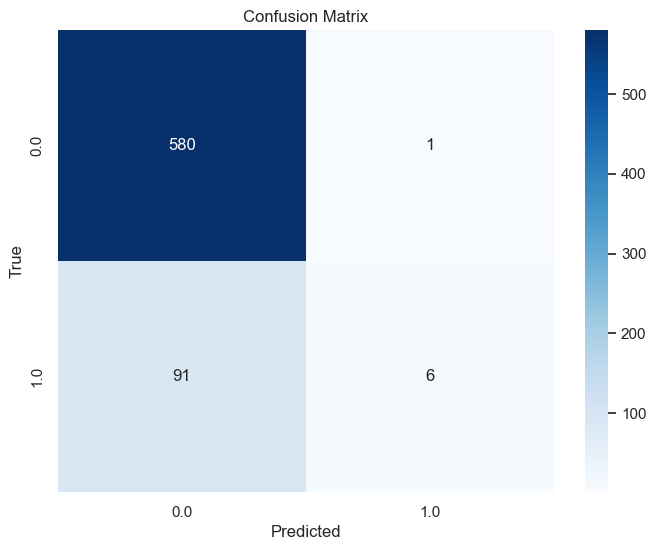

In [210]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

column_labels = list(y_test.unique())
cm = confusion_matrix(y_test, y_test_pred, labels=column_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=column_labels, yticklabels=column_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [211]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       581
         1.0       0.86      0.06      0.12        97

    accuracy                           0.86       678
   macro avg       0.86      0.53      0.52       678
weighted avg       0.86      0.86      0.81       678



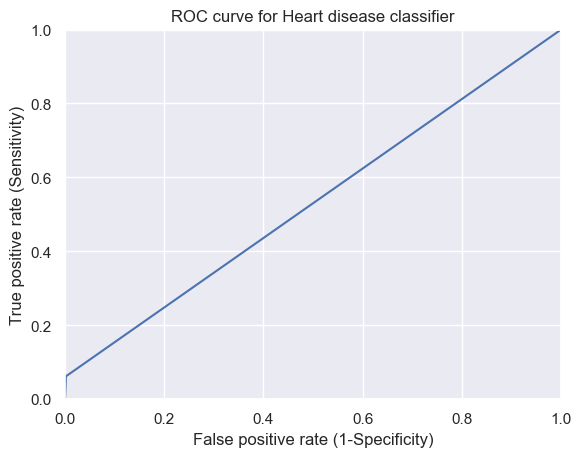

In [236]:
#ROC Curve

#ROC Curves summarizes the trade-off between the true positive rate and the false positive rate 
#for the predictive model using different probability thresholds.


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)






In [231]:
#global performance of a model,100% if perfect,50% if non informative model
from sklearn.metrics import roc_auc_score
auc_roc=roc_auc_score(y_true=y_test, y_score=y_test_pred)
print(auc_roc)

0.5300672498536118


In [232]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_test_pred)


0.5300672498536118

In [233]:
# Conclusion
#Coefficients
print(lr.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(lr.coef_.ravel(),x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients


[-4.21166472]


,Coeffecient
diabetes,0.784153
is_smoking,0.361780
prevalentHyp,0.268663
sysBP,0.024319
diaBP,-0.013500


<Figure size 1000x1200 with 0 Axes>